In [1]:
from proxy_methods_final import *
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel


/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# set global plotting format
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

# Load data
---

In [3]:
#Prices data
#-----------------------------------------
prices_data = pd.read_csv('data/reshaped_data.csv')
prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)
prices_data = prices_data.set_index('Date')

#Index data
#-----------------------------------------
index_data = pd.read_csv('ITRAXX-Europe Timeseries 20241127.csv') #To be used for b0
index_data.rename(columns={'AsOf':'Date'}, inplace=True)
try:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d-%b-%y')
except Exception as e:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d/%b/%y')
index_data = index_data.sort_values(by='Date', ascending=True)
#Metadata
#-----------------------------------------
metadata = pd.read_csv('data/metadata.csv')

#Community detection
#-----------------------------------------
correlation_matrix,T,N,company_names = create_correlation_matrix('data/eur_data_standardized_returns.csv')
C_g = calculate_C_g(correlation_matrix, T, N)
result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_39705/1307506813.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)


# Generate proxies
---

In [4]:
# ticker = "AF" #Defined for the purposes of getting the liquid bucket (EVEN THOUGH WE USE THE INDEX)
# date = '2015-12-30'
# liquid_bucket = get_bucket(metadata, company_communities,ticker)[0]
# metadata_with_proxies = calculate_proxies_and_add_to_metadata(metadata, company_communities, prices_data, index_data, liquid_bucket, date)
# # metadata_with_proxies.to_csv('data/metadata_with_proxies.csv', index=False)

In [38]:
#Get matching dates in price data and index data
#-----------------------------------------
price_dates = prices_data.index.tolist()

#Extract date portion of the datetime object in the price data
index_dates = index_data['Date'].tolist()

matching_dates = [date for date in price_dates if date in index_dates]

In [40]:
len(matching_dates)

2515

In [6]:
# tickers = prices_data.columns.to_list() #First 10 tickers

# #ALEX DATES
# #-----------
# #dates = matching_dates[0:839]

# # #CALVIN DATES
# # dates = matching_dates[839:1678] 

# # #VINAYS DATES
# dates = matching_dates[1678:1683] 

# proxy_time_series_df = calculate_proxy_time_series(tickers, metadata, company_communities, prices_data, index_data, dates)
# proxy_time_series_df.to_csv('data/proxy_time_series_vinay_test.csv', index=False)

In [7]:
# #Return rows with Nan values
# proxy_time_series_df[proxy_time_series_df.isnull().any(axis=1)]

In [8]:
# #TROUBLESHOOTING
# #-----------------------------------------
# tickers = [prices_data.columns.to_list()[0]] #First ticker
# dates = matching_dates[0:1] #1 date
# # CALVIN: Changed calculate_proxy_time_series to use get_bucket to obtain bucket of respective ticker
# # define liquid bucket 
# # liquid_bucket = {
# #         'Sector': 'Financials',   
# #         'Country': 'United Kingdom',
# #         'Rating': 10
# #     }


# proxy_time_series_df = calculate_proxy_time_series(tickers, metadata, company_communities, prices_data, index_data, dates)
# proxy_time_series_df
# #-----------------------------------------

In [9]:
# proxy_time_series_df

# Normal CSRA vs Community CSRA
---

In [ ]:
# #First 839 days (alex)
# proxy_time_series_df_alex = pd.read_csv('data/proxy_time_series_alex.csv')

# #Vinay
# proxy_time_series_df_vinay1 = pd.read_csv('data/proxy_time_series_vinay_1.csv')
# proxy_time_series_df_vinay2 = pd.read_csv('data/proxy_time_series_vinay_2.csv')

# #Calvin

# proxy_time_series_df_calvin = pd.read_csv('data/proxy_time_series_calvin.csv')

In [ ]:
# proxy_time_series_concat = pd.concat([proxy_time_series_df_alex ,proxy_time_series_df_calvin, proxy_time_series_df_vinay1, proxy_time_series_df_vinay2])
# proxy_time_series_concat = proxy_time_series_concat.reset_index(drop=True)
# proxy_time_series_concat.to_csv('data/proxy_time_series_final.csv', index=False)

In [31]:
proxy_time_series_final = pd.read_csv('data/proxy_time_series_final.csv')

In [33]:
proxy_time_series_final

,Ticker,Date,Actual_Spread,Proxy_Intersection,Proxy_Intersection_Community,Proxy_CSRA,Proxy_CSRA_Community
0,AAUK,2010-09-14,179.666667,105.00,105.00,188.974433,127.596349
1,AAUK,2010-09-15,175.666667,105.58,105.58,188.816758,128.455915
2,AAUK,2010-09-16,174.666667,106.28,106.28,187.841680,126.075857
3,AAUK,2010-09-17,169.500000,106.96,106.96,185.686246,125.608172
4,AAUK,2010-09-20,171.833333,110.97,110.97,185.298630,125.807404
...,...,...,...,...,...,...,...
799765,ZINCO,2020-04-28,42.449000,81.58,81.58,62.703104,58.482617
799766,ZINCO,2020-04-29,40.402900,78.02,78.02,62.562567,58.453902
799767,ZINCO,2020-04-30,39.661100,80.58,80.58,62.921179,58.438804
799768,ZINCO,2020-05-01,42.251900,83.58,83.58,64.411428,59.570116


In [34]:
#Get index of max spread
acual_spreads = proxy_time_series_final['Actual_Spread']

max_spread = np.max(acual_spreads)

max_spread_index = acual_spreads.idxmax()
max_spread_index

599436

In [35]:
#Get row with max spread
proxy_time_series_final.loc[max_spread_index]


Ticker                                 NSINO
Date                              2017-09-07
Actual_Spread                   49173.787728
Proxy_Intersection                     53.28
Proxy_Intersection_Community           53.28
Proxy_CSRA                        110.871132
Proxy_CSRA_Community                   53.28
Name: 599436, dtype: object

In [36]:
#Remove row with NSINO Ticker (biggest spread)
proxy_time_series_filtered = proxy_time_series_final[proxy_time_series_final['Ticker'] != 'NSINO']

In [37]:
dates = proxy_time_series_filtered['Date'].unique().tolist()
len(dates)

2515

In [41]:
rmse_intersection_normal_list, rmse_intersection_communities_list, rmse_csra_normal_list, rmse_csra_communities_list = calculate_rmse_curves(proxy_time_series_filtered, dates)

/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])


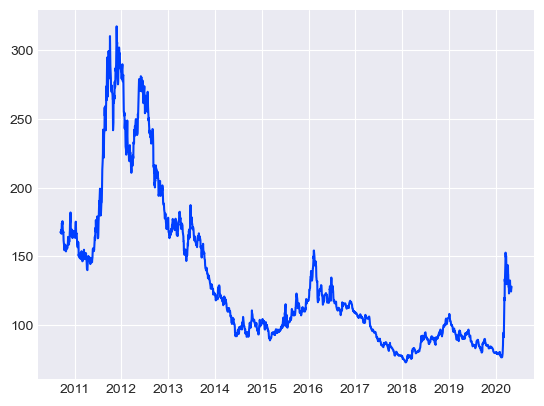

In [55]:
#Plot mean of actual spreads for each date
actual_spreads_means = proxy_time_series_filtered['Actual_Spread'].groupby(proxy_time_series_filtered['Date']).mean()
plt.plot(actual_spreads_means)

In [57]:
#Normalize RMSE curves using the mean of the actual spreads

rmse_intersection_normal_list_normalized = rmse_intersection_normal_list/actual_spreads_means
rmse_intersection_communities_list_normalized = rmse_intersection_communities_list/actual_spreads_means
rmse_csra_normal_list_normalized = rmse_csra_normal_list/actual_spreads_means
rmse_csra_communities_list_normalized = rmse_csra_communities_list/actual_spreads_means

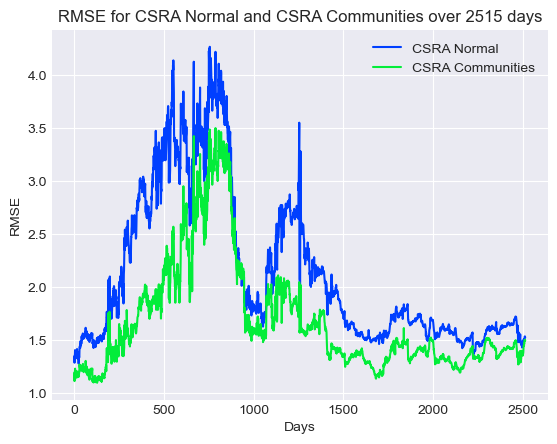

In [58]:
plot_rmse_curves(rmse_csra_normal_list_normalized, rmse_csra_communities_list_normalized, dates ,method='CSRA')

In [59]:
paired_t_test(rmse_csra_normal_list_normalized, rmse_csra_communities_list_normalized)

Shapiro-Wilk Test Statistic: 0.8787328004837036, p-value: 1.572999565158537e-40
CHECKING FOR NORMALITY OF DIFFERENCES
--------------------------------------
The differences do not appear to be normally distributed (reject H0).
Cannot perform a paired t-test.


(array([ 48., 587., 495., 238., 131., 136.,  96.,  57.,  90., 129.,  58.,
         62.,  55.,  82.,  82.,  50.,  48.,  47.,  14.,  10.]),
 array([1.27825715, 1.42751671, 1.57677627, 1.72603582, 1.87529538,
        2.02455494, 2.1738145 , 2.32307406, 2.47233362, 2.62159318,
        2.77085274, 2.9201123 , 3.06937186, 3.21863142, 3.36789098,
        3.51715054, 3.6664101 , 3.81566966, 3.96492922, 4.11418878,
        4.26344834]),
 <BarContainer object of 20 artists>)

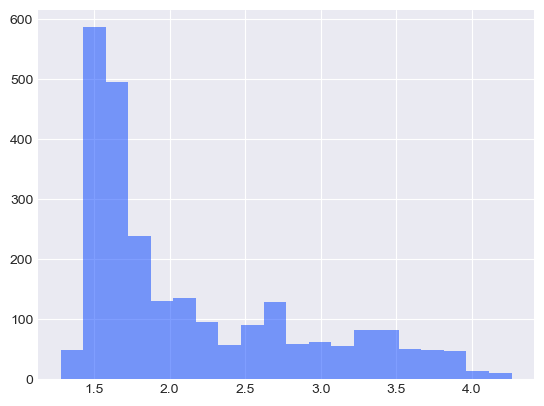

In [60]:
plt.hist(rmse_csra_normal_list_normalized, bins=20, alpha=0.5, label='Normal')

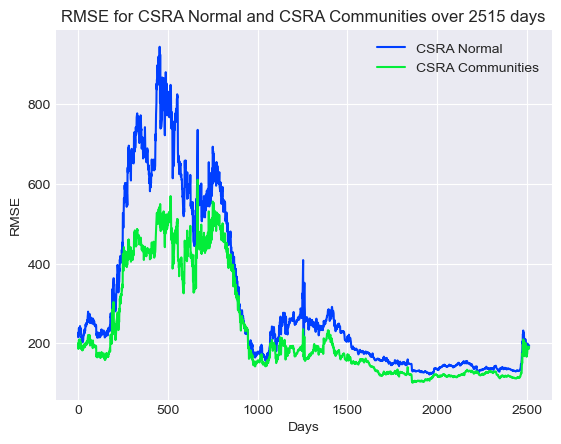

In [ ]:
plot_rmse_curves(rmse_csra_normal_list, rmse_csra_communities_list, dates ,method='CSRA')

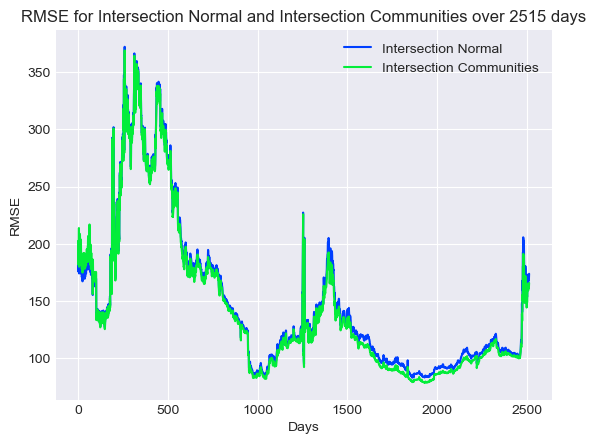

In [44]:
plot_rmse_curves(rmse_intersection_normal_list, rmse_intersection_communities_list, dates, method='Intersection')

In [45]:
calculate_percentage_better(rmse_csra_normal_list, rmse_csra_communities_list, method='CSRA')

Number of days where RMSE for normal CSRA method > RMSE for community CSRA method : 2494
Percentage of days where CSRA Communities method is better: 99.16500994035785%


In [46]:
calculate_percentage_better(rmse_intersection_normal_list, rmse_intersection_communities_list, method='Intersection')

Number of days where RMSE for normal Intersection method > RMSE for community Intersection method : 2413
Percentage of days where Intersection Communities method is better: 95.94433399602386%


In [23]:
paired_t_test(rmse_csra_normal_list, rmse_csra_communities_list)

Shapiro-Wilk Test Statistic: 0.7323299050331116, p-value: 0.0
CHECKING FOR NORMALITY OF DIFFERENCES
--------------------------------------
The differences do not appear to be normally distributed (reject H0).
Cannot perform a paired t-test.


# Further analysis
---

In [80]:
def generate_rmse_curves_per_category(category,proxy_time_series_filtered,metadata):
    
    dates = proxy_time_series_filtered['Date'].unique().tolist()

    category_values = metadata[category].unique().tolist()

    rmse_intersection_normal_list_category = []

    rmse_intersection_communities_list_category = []

    rmse_csra_normal_list_category = []

    rmse_csra_communities_list_category = []

    for category_value in category_values:

        category_tickers = metadata[metadata[category] == category_value]['Ticker'].tolist()

        proxy_time_series_filtered_category = proxy_time_series_filtered[proxy_time_series_filtered['Ticker'].isin(category_tickers)]

        rmse_intersection_normal_list, rmse_intersection_communities_list, rmse_csra_normal_list, rmse_csra_communities_list = calculate_rmse_curves(proxy_time_series_filtered_category, dates)

        rmse_intersection_normal_list_category.append(rmse_intersection_normal_list)

        rmse_intersection_communities_list_category.append(rmse_intersection_communities_list)

        rmse_csra_normal_list_category.append(rmse_csra_normal_list)

        rmse_csra_communities_list_category.append(rmse_csra_communities_list)

    return rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category


In [81]:
rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category = generate_rmse_curves_per_category('Sector',proxy_time_series_filtered,metadata)

/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [84]:
def create_results_table_for_category(category,metadata,rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category):

    category_values = metadata[category].unique().tolist()


    #Create table with average RMSE for each sector for all methods

    average_rmse_per_category = []

    for i, category_value in enumerate(category_values):

        average_rmse_intersection_normal_list_category = np.mean(rmse_intersection_normal_list_category[i])
        average_rmse_intersection_communities_list_category = np.mean(rmse_intersection_communities_list_category[i])
        average_rmse_csra_normal_list_category = np.mean(rmse_csra_normal_list_category[i])
        average_rmse_csra_communities_list_category = np.mean(rmse_csra_communities_list_category[i])

        average_rmse_per_category.append([category_value, average_rmse_intersection_normal_list_category, average_rmse_intersection_communities_list_category, average_rmse_csra_normal_list_category, average_rmse_csra_communities_list_category])

    average_rmse_per_category_df = pd.DataFrame(average_rmse_per_category, columns=[category, 'Average_RMSE_Intersection_Normal', 'Average_RMSE_Intersection_Communities','Average_RMSE_CSRA_Normal', 'Average_RMSE_CSRA_Communities'])

    #average_rmse_per_category_df.to_csv(f'data/average_rmse_per{category}.csv', index=False)

    return average_rmse_per_category_df




In [ ]:
#Sector
rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category = generate_rmse_curves_per_category('Sector',proxy_time_series_filtered,metadata)
average_rmse_per_category_df = create_results_table_for_category('Sector',metadata,rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category)
average_rmse_per_category_df

,Sector,Average_RMSE_Intersection_Normal,Average_RMSE_Intersection_Communities,Average_RMSE_CSRA_Normal,Average_RMSE_CSRA_Communities
0,Basic Materials,173.329225,168.379063,432.111336,252.879356
1,Industrials,152.772415,125.364836,195.657242,136.378311
2,Consumer Services,138.143142,139.106447,235.738083,140.283635
3,Financials,150.567624,151.634694,336.527267,251.608300
4,Utilities,138.025784,137.860375,215.158258,208.511379
5,Consumer Goods,112.108183,108.863239,177.494748,188.333486
6,Technology,178.365614,178.365614,825.722280,294.938249
7,Government,124.625794,124.625794,215.789823,202.830173
8,Health Care,45.143433,45.143433,47.094400,276.943700
9,Oil & Gas,53.304911,56.064692,176.216424,68.917085


In [88]:
#Rating
rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category = generate_rmse_curves_per_category('AverageRating',proxy_time_series_filtered,metadata)
average_rmse_per_category_df = create_results_table_for_category('AverageRating',metadata,rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category)
average_rmse_per_category_df.sort_values(by='AverageRating')

/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,AverageRating,Average_RMSE_Intersection_Normal,Average_RMSE_Intersection_Communities,Average_RMSE_CSRA_Normal,Average_RMSE_CSRA_Communities
11,1,29.906218,29.906218,602.896644,190.842857
12,2,54.882833,54.882833,214.367934,107.614354
8,3,31.534199,31.534199,299.645907,86.829217
13,4,42.088118,42.088118,33.680899,33.416779
3,5,19.723786,19.365828,363.530409,101.464677
7,6,33.295534,37.593227,383.231834,354.507366
4,7,40.363562,42.084767,141.874907,193.766514
9,8,53.993623,53.993623,216.785410,93.878477
1,9,116.349539,109.832281,458.225873,146.682181
2,10,170.527132,165.807815,273.689625,256.758083


In [ ]:
#Country
rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category = generate_rmse_curves_per_category('Country',proxy_time_series_filtered,metadata)
average_rmse_per_category_df = create_results_table_for_category('Country',metadata,rmse_intersection_normal_list_category, rmse_intersection_communities_list_category, rmse_csra_normal_list_category, rmse_csra_communities_list_category)
average_rmse_per_category_df

/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Country,Average_RMSE_Intersection_Normal,Average_RMSE_Intersection_Communities,Average_RMSE_CSRA_Normal,Average_RMSE_CSRA_Communities
0,United Kingdom,105.509342,106.738026,106.471954,97.664060
1,Spain,81.582567,81.582567,132.014910,124.173880
2,France,125.101988,122.604882,118.644597,131.359923
3,Italy,119.468363,117.618454,143.301672,253.030028
4,Germany,86.183078,89.628678,127.841946,160.138938
5,Netherlands,97.631074,100.812013,709.075537,181.314818
6,Belgium,76.918354,76.918354,419.972881,110.586402
7,Greece,773.336435,773.336435,780.997761,540.198560
8,Luxembourg,230.147408,221.914302,399.503438,255.541381
9,Sweden,177.772432,124.415131,156.745400,166.931360


/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_time_series_df['Date'] = pd.to_datetime(proxy_time_series_df['Date'])
/Users/alex_1/Documents/GitHub/ATCF/proxy_methods_final.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

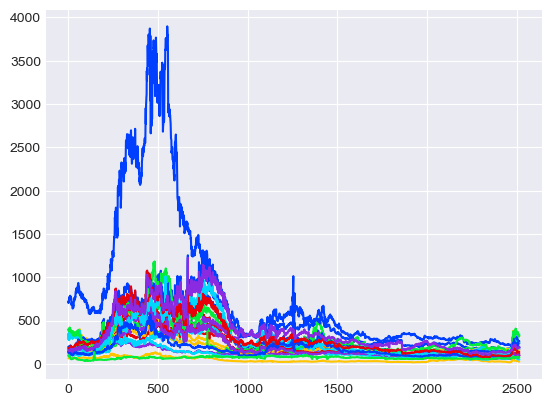

In [ ]:
#Breakdown per sector

sectors = metadata['Sector'].unique().tolist()

rmse_intersection_normal_list_sector = []

rmse_intersection_communities_list_sector = []

rmse_csra_normal_list_sector = []

rmse_csra_communities_list_sector = []

for sector in sectors:

    sector_tickers = metadata[metadata['Sector'] == sector]['Ticker'].tolist()

    proxy_time_series_sector = proxy_time_series_filtered[proxy_time_series_filtered['Ticker'].isin(sector_tickers)]

    rmse_intersection_normal_list_sector_sector, rmse_intersection_communities_list_sector_sector, rmse_csra_normal_list_sector_sector, rmse_csra_communities_list_sector_sector = calculate_rmse_curves(proxy_time_series_sector, dates)

    rmse_intersection_normal_list_sector.append(rmse_intersection_normal_list_sector_sector)
    rmse_intersection_communities_list_sector.append(rmse_intersection_communities_list_sector_sector)
    rmse_csra_normal_list_sector.append(rmse_csra_normal_list_sector_sector)
    rmse_csra_communities_list_sector.append(rmse_csra_communities_list_sector_sector)



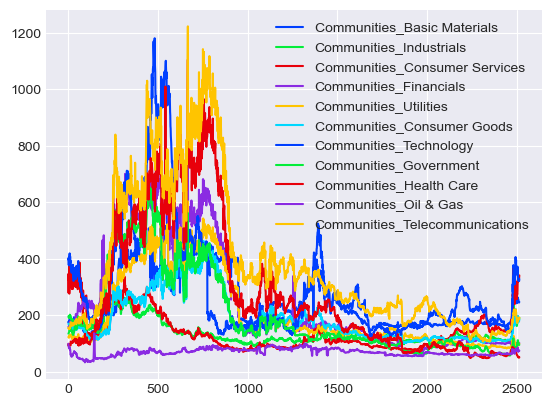

In [71]:

#Plot RMSE curves for each sector
for i, sector in enumerate(sectors):

    # if sector == "Technology":
    #     continue

    #plt.plot(rmse_csra_normal_list_sector[i], label=f'Normal_{sector}')
    plt.plot(rmse_csra_communities_list_sector[i], label=f'Communities_{sector}')
    plt.legend()
    #plot_rmse_curves(rmse_csra_normal_list_sector[i], rmse_csra_communities_list_sector[i], dates ,method='CSRA')
  


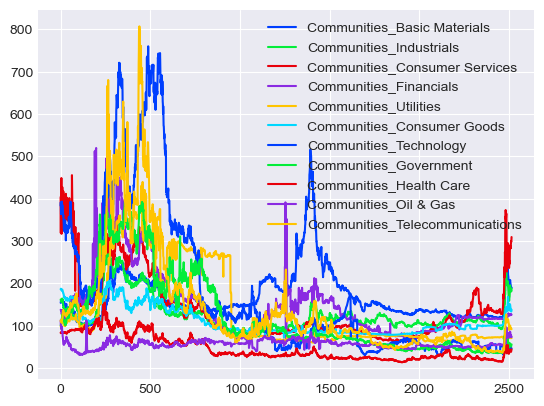

In [73]:

#Plot RMSE curves for each sector
for i, sector in enumerate(sectors):

    # if sector == "Technology":
    #     continue

    #plt.plot(rmse_intersection_normal_list_sector[i], label=f'Normal_{sector}')
    plt.plot(rmse_intersection_communities_list_sector[i], label=f'Communities_{sector}')
    plt.legend()
    #plot_rmse_curves(rmse_csra_normal_list_sector[i], rmse_csra_communities_list_sector[i], dates ,method='CSRA')
  


<BarContainer object of 11 artists>

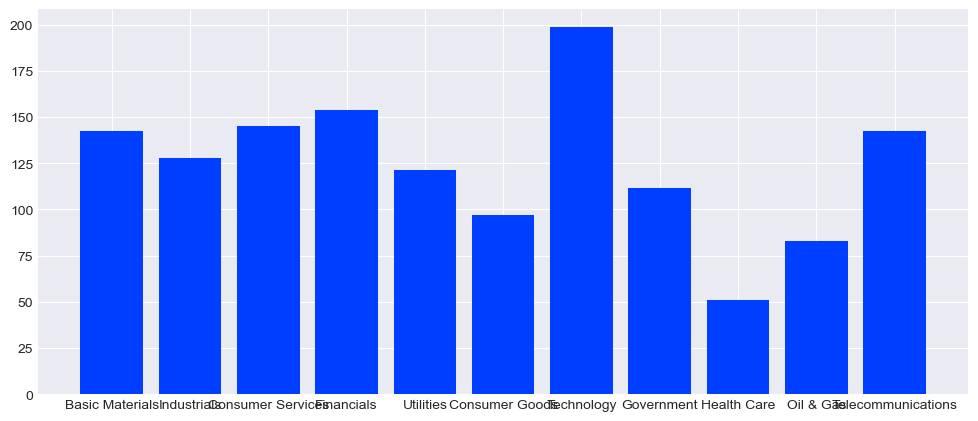

In [76]:
#Calculate average spread for each sector
average_spreads_per_sector = []

for i, sector in enumerate(sectors):
    
        sector_tickers = metadata[metadata['Sector'] == sector]['Ticker'].tolist()
    
        proxy_time_series_sector = proxy_time_series_filtered[proxy_time_series_filtered['Ticker'].isin(sector_tickers)]
    
        average_spread = proxy_time_series_sector['Actual_Spread'].mean()
    
        average_spreads_per_sector.append(average_spread)

#Plot average spread for each sector

plt.figure(figsize=(12,5))
plt.bar(sectors, average_spreads_per_sector)

In [79]:
#Create table with average RMSE for each sector for all methods

average_rmse_per_sector = []

for i, sector in enumerate(sectors):

    average_rmse__csra_normal = np.mean(rmse_csra_normal_list_sector[i])
    average_rmse_csra_communities = np.mean(rmse_csra_communities_list_sector[i])
    average_rmse_intersection_normal = np.mean(rmse_intersection_normal_list_sector[i])
    average_rmse_intersection_communities = np.mean(rmse_intersection_communities_list_sector[i])

    average_rmse_per_sector.append([sector, average_rmse__csra_normal, average_rmse_csra_communities, average_rmse_intersection_normal, average_rmse_intersection_communities])

average_rmse_per_sector_df = pd.DataFrame(average_rmse_per_sector, columns=['Sector', 'Average_RMSE_CSRA_Normal', 'Average_RMSE_CSRA_Communities', 'Average_RMSE_Intersection_Normal', 'Average_RMSE_Intersection_Communities'])

average_rmse_per_sector_df.to_csv('data/average_rmse_per_sector.csv', index=False)


In [78]:
average_rmse_per_sector_df

,Sector,Average_RMSE_CSRA_Normal,Average_RMSE_CSRA_Communities,Average_RMSE_Intersection_Normal,Average_RMSE_Intersection_Communities
0,Basic Materials,432.111336,252.879356,173.329225,168.379063
1,Industrials,195.657242,136.378311,152.772415,125.364836
2,Consumer Services,235.738083,140.283635,138.143142,139.106447
3,Financials,336.527267,251.608300,150.567624,151.634694
4,Utilities,215.158258,208.511379,138.025784,137.860375
5,Consumer Goods,177.494748,188.333486,112.108183,108.863239
6,Technology,825.722280,294.938249,178.365614,178.365614
7,Government,215.789823,202.830173,124.625794,124.625794
8,Health Care,47.094400,276.943700,45.143433,45.143433
9,Oil & Gas,176.216424,68.917085,53.304911,56.064692


In [ ]:
#Create table with average RMSE for each rating for all methods

ratings = metadata['Rating'].unique().tolist()

average_rmse_per_rating = []    

for rating in ratings:

    rating_tickers = metadata[metadata['Rating'] == rating]['Ticker'].tolist()

    proxy_time_series_rating = proxy_time_series_filtered[proxy_time_series_filtered['Ticker'].isin(rating_tickers)]

    rmse_intersection_normal_list_rating = []

    rmse_intersection_communities_list_rating = []

    rmse_csra_normal_list_rating = []

    rmse_csra_communities_list_rating = []

    for sector in sectors:

        sector_tickers = metadata[metadata['Sector'] == sector]['Ticker'].tolist()

        proxy_time_series_sector = proxy_time_series_rating[proxy_time_series_rating['Ticker'].isin(sector_tickers)]

        rmse_intersection_normal_list_sector_sector, rmse_intersection_communities_list_sector_sector, rmse_csra_normal_list_sector_sector, rmse_csra_communities_list_sector_sector = calculate_rmse_curves(proxy_time_series_sector, dates)

        rmse_intersection_normal_list_rating.append(rmse_intersection_normal_list_sector_sector)
        rmse_intersection_communities_list_rating.append(rmse_intersection_communities_list_sector_sector)
        rmse_csra_normal_list_rating.append(rmse_csra_normal_list_sector_sector)
        rmse_csra_communities_list_rating.append(rmse_csra_communities_list_sector_sector)

    average_rmse__csra_normal = np.mean(rmse_csra_normal_list_rating)
    average_rmse_csra_communities = np.mean(rmse_csra_communities_list_rating)
    average_rmse_intersection_normal = np.mean(rmse_intersection_normal_list_rating)
    average_rmse_intersection_communities = np.mean(rmse_intersection_communities_list_rating)

    average_rmse_per_rating.append([rating, average_rmse__csra_normal, average_rmse_csra_communities, average_rmse_intersection_normal, average_rmse_intersection_communities])

